# **LIBRARY IMPORTS**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import zscore

# **LOAD AND EXPLORE THE DATASET**

In [2]:
iris_data = pd.read_csv("/content/drive/MyDrive/IRIS.csv")

In [7]:
iris_data.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_data['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


# **DATA VISUALIZATION**

***Correlation Heatmap***

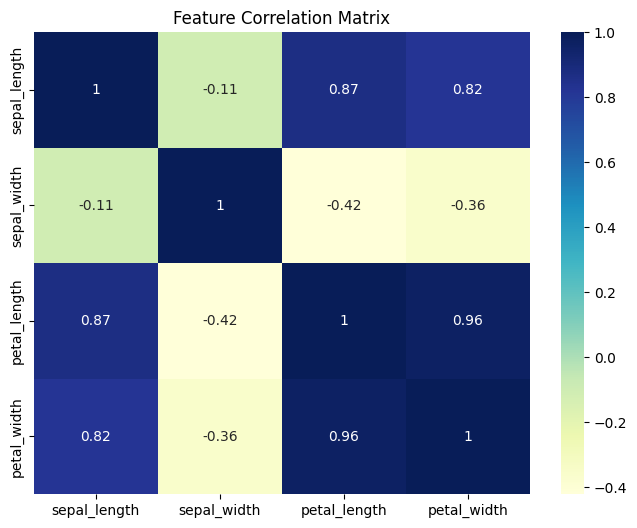

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(iris_data.select_dtypes(include=np.number).corr(), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation Matrix")
plt.show()

***Pairplot by Species***

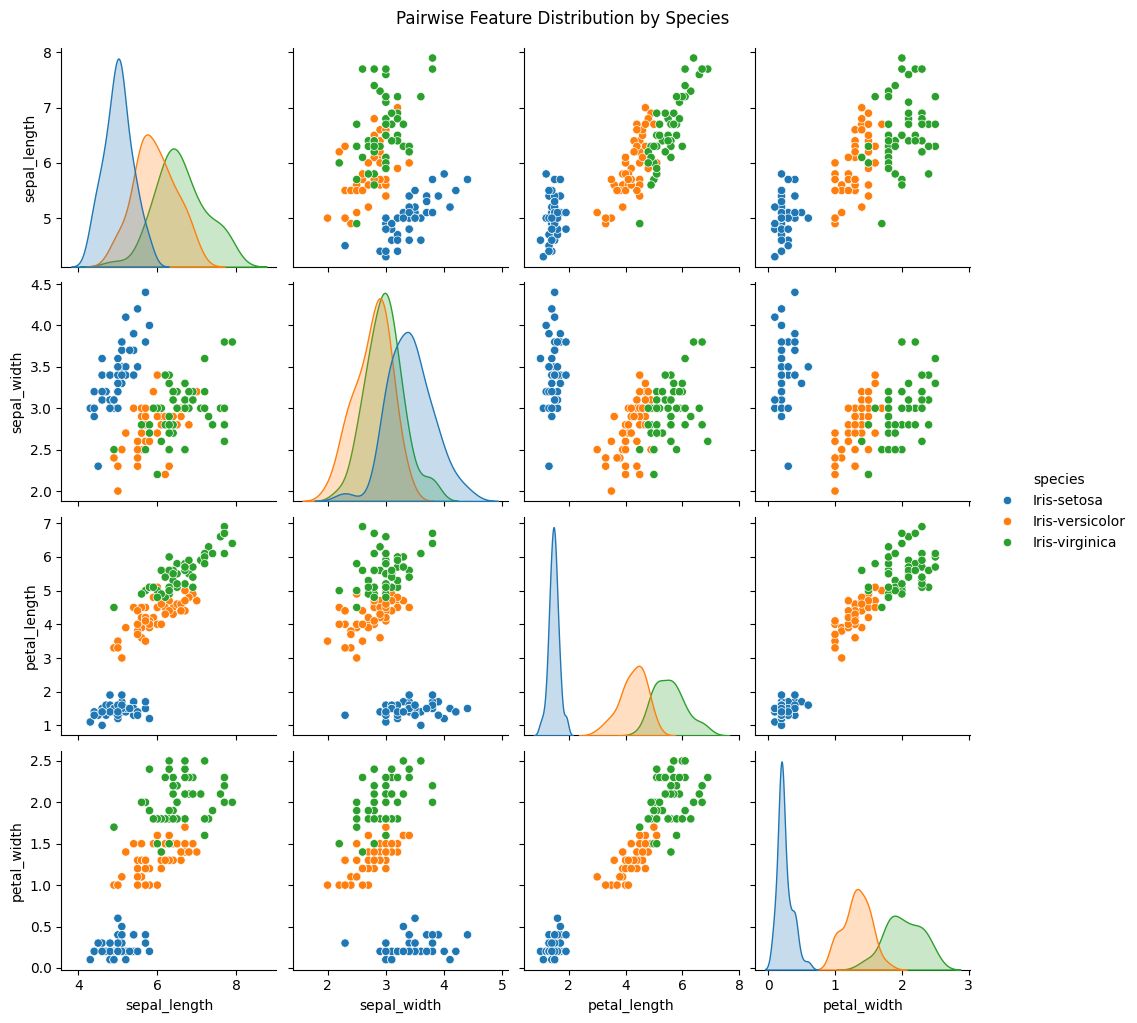

In [11]:
sns.pairplot(iris_data, hue='species')
plt.suptitle("Pairwise Feature Distribution by Species", y=1.02)
plt.show()

***Boxplot of Features by Species***

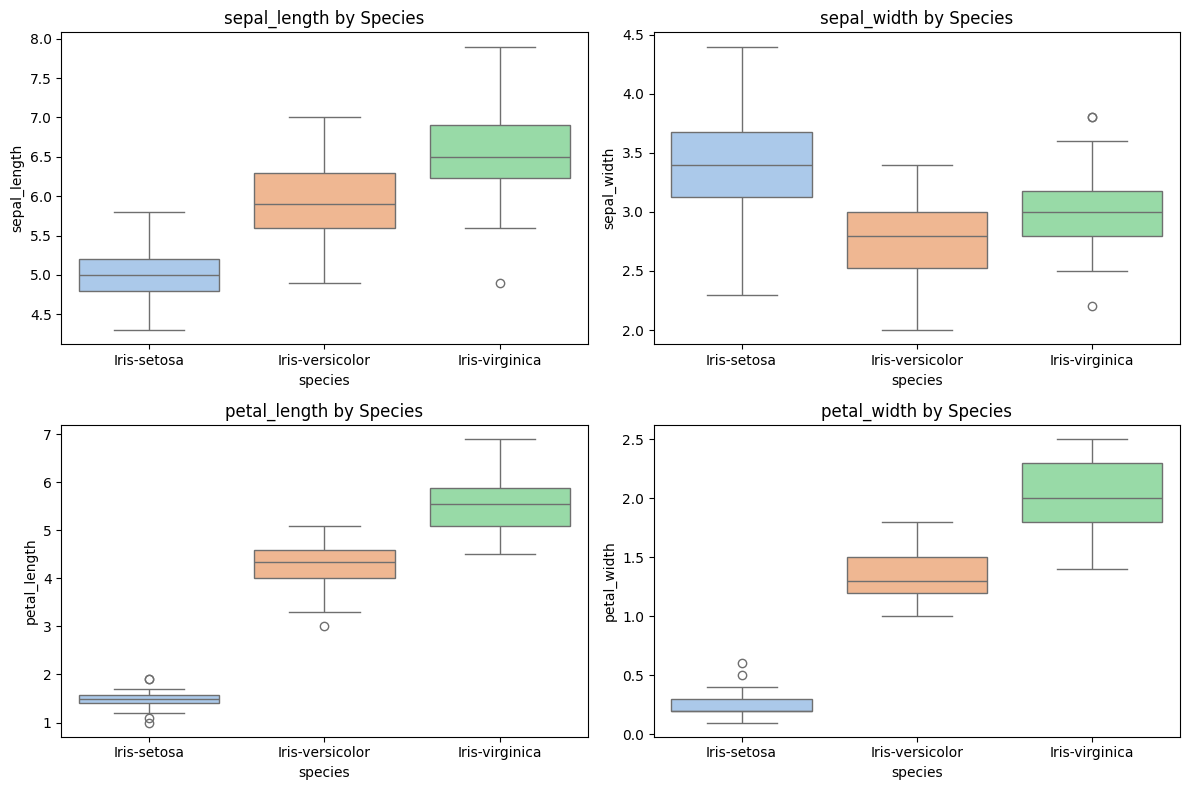

In [13]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(feature_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=iris_data, x='species', y=feature, hue='species', palette='pastel', legend=False)
    plt.title(f"{feature} by Species")
plt.tight_layout()
plt.show()

# **PREPROCESSING**

***Encode Target Labels***

In [14]:
encoder = LabelEncoder()
iris_data['species_encoded'] = encoder.fit_transform(iris_data['species'])

***Feature and Label Split***

In [15]:
X = iris_data.drop(['species', 'species_encoded'], axis=1)
y = iris_data['species_encoded']

***Train-Test Split***

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **MODEL TRAINING**

In [17]:
classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200)

# **EVALUATION & PREDICTIONS**

***Predictions & Metrics***

In [18]:
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



***Confusion Matrix***

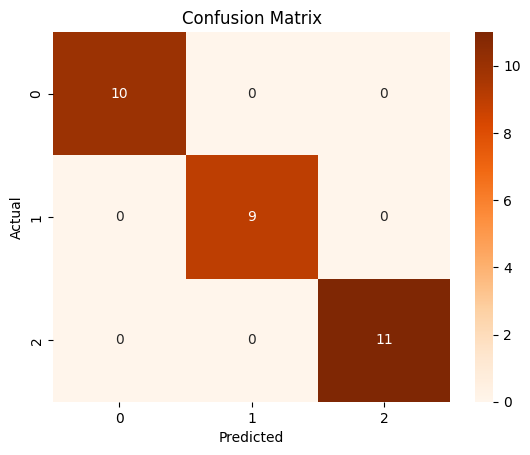

In [19]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Oranges', fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **PREDICTING ON NEW SAMPLE**

In [21]:
sample = pd.DataFrame([[5.4, 3.7, 1.5, 0.2]], columns=X.columns)
predicted_species = encoder.inverse_transform(classifier.predict(sample))
print("Predicted species for sample input:", predicted_species[0])


Predicted species for sample input: Iris-setosa


# **ADDITIONAL ANALYTICS**

***Most Common Species***

In [22]:
most_common_species = iris_data['species'].mode()[0]
print(f"Most common species in the dataset: {most_common_species}")

Most common species in the dataset: Iris-setosa


***Mean Petal and Sepal Length by Species***

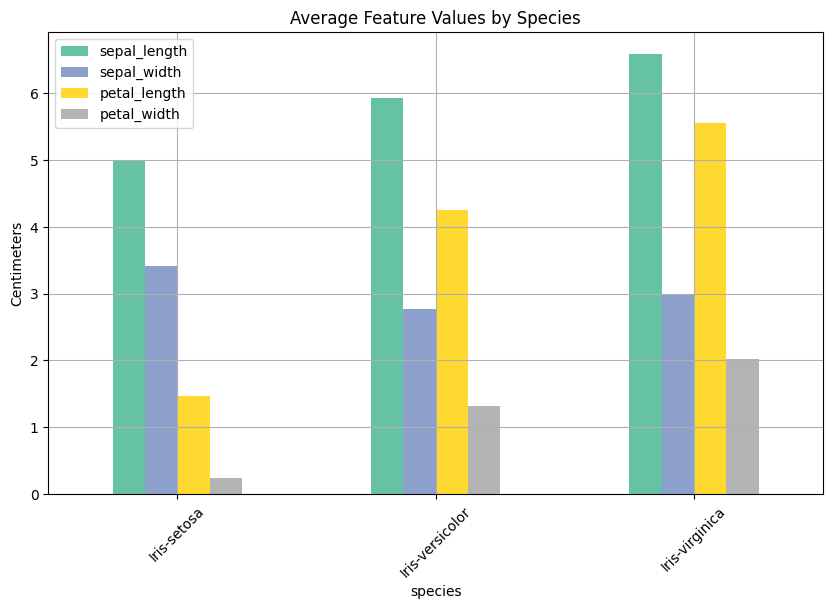

In [23]:
mean_dimensions = iris_data.groupby('species')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()
mean_dimensions.plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title('Average Feature Values by Species')
plt.ylabel('Centimeters')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

***Species Count Distribution (Pie Chart)***

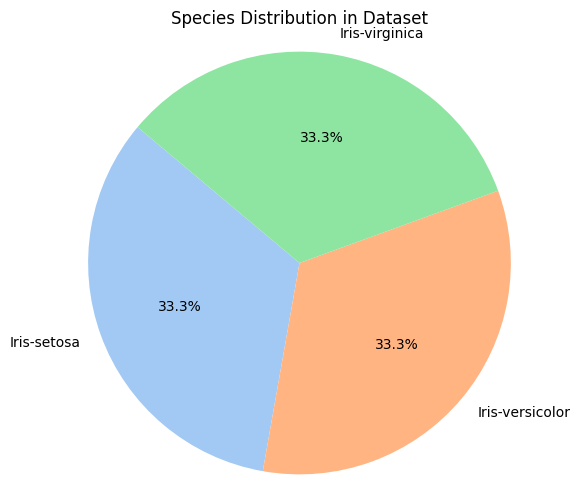

In [24]:
species_counts = iris_data['species'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Species Distribution in Dataset')
plt.axis('equal')
plt.show()

***Petal vs Sepal Length Comparison***

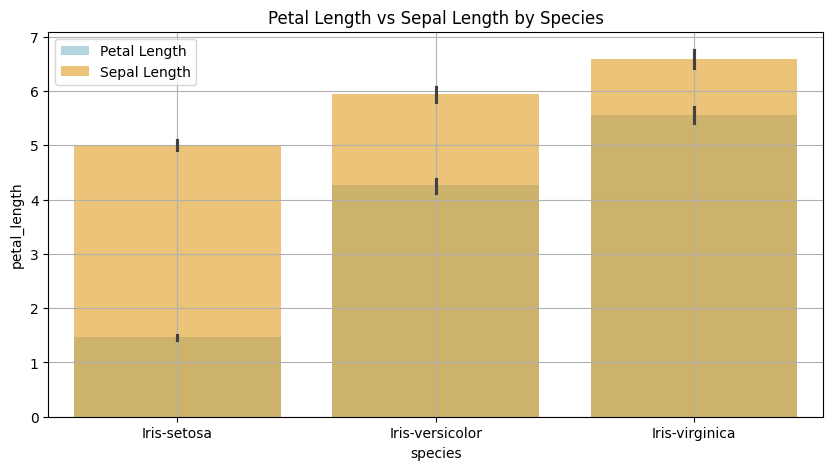

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(data=iris_data, x='species', y='petal_length', color='lightblue', label='Petal Length')
sns.barplot(data=iris_data, x='species', y='sepal_length', color='orange', alpha=0.6, label='Sepal Length')
plt.title('Petal Length vs Sepal Length by Species')
plt.legend()
plt.grid(True)
plt.show()

***Feature Means vs Medians***

<Figure size 1000x600 with 0 Axes>

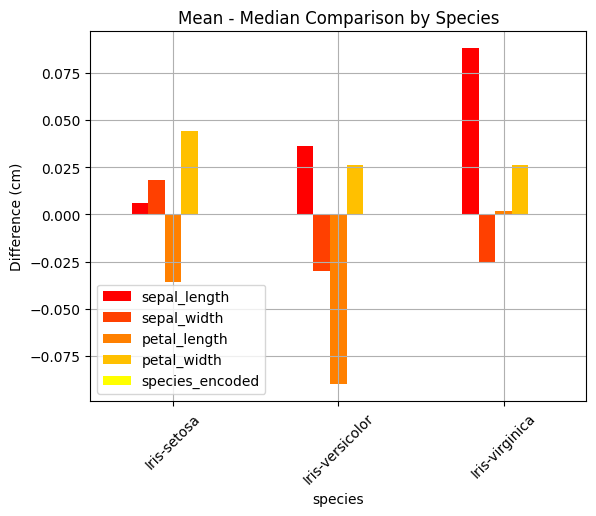

In [26]:
mean_vals = iris_data.groupby('species').mean()
median_vals = iris_data.groupby('species').median()

plt.figure(figsize=(10, 6))
(mean_vals - median_vals).plot(kind='bar', colormap='autumn')
plt.title('Mean - Median Comparison by Species')
plt.ylabel('Difference (cm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

***Feature Correlation by Species***

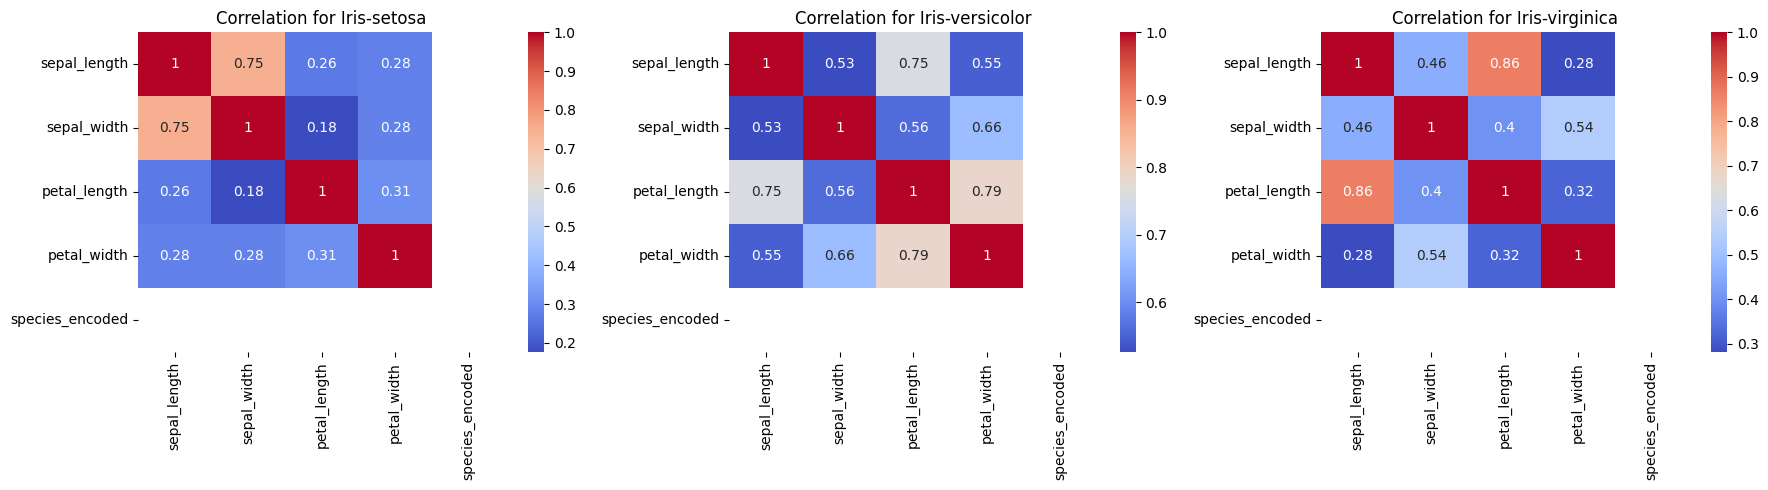

In [28]:
species_list = iris_data['species'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, sp in enumerate(species_list):
    subset = iris_data[iris_data['species'] == sp].select_dtypes(include=np.number)
    corr_matrix = subset.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[idx])
    axes[idx].set_title(f"Correlation for {sp}")
plt.tight_layout()
plt.show()

***Sepal Area vs Petal Area***

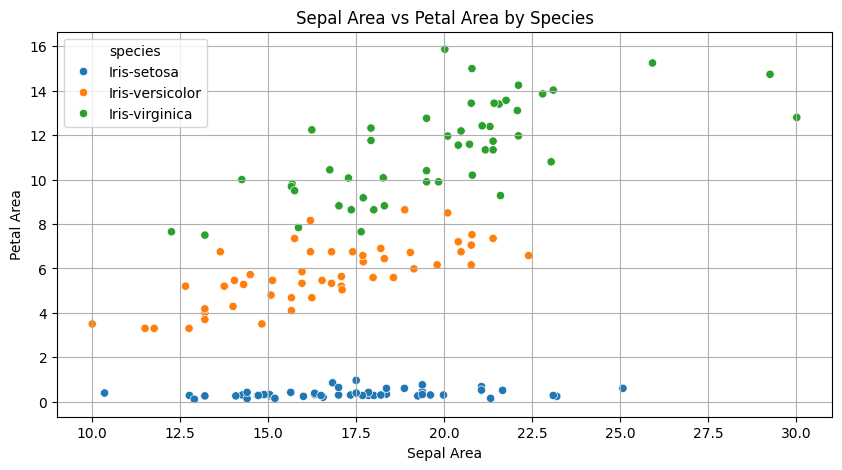

In [29]:
iris_data['sepal_area'] = iris_data['sepal_length'] * iris_data['sepal_width']
iris_data['petal_area'] = iris_data['petal_length'] * iris_data['petal_width']

plt.figure(figsize=(10, 5))
sns.scatterplot(data=iris_data, x='sepal_area', y='petal_area', hue='species')
plt.title("Sepal Area vs Petal Area by Species")
plt.xlabel("Sepal Area")
plt.ylabel("Petal Area")
plt.grid(True)
plt.show()

***Violin Plot for Petal Length***

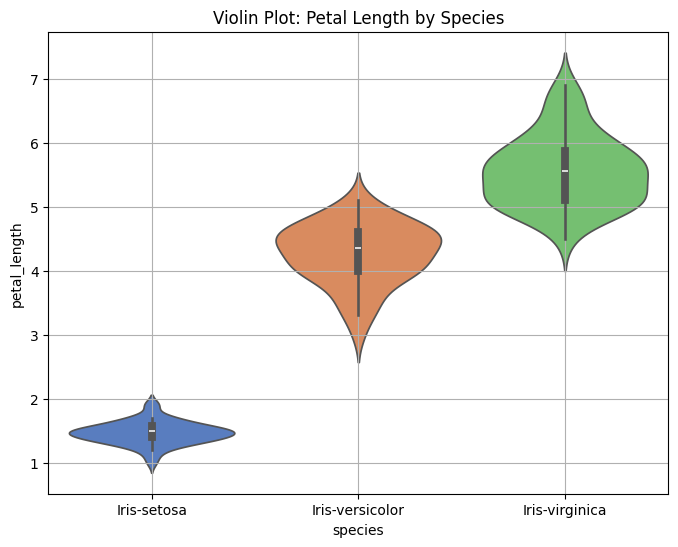

In [31]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=iris_data, x='species', y='petal_length', hue='species', palette='muted', legend=False)
plt.title("Violin Plot: Petal Length by Species")
plt.grid(True)
plt.show()


***Outlier Detection with Z-Score***

In [32]:
z_scores = np.abs(zscore(iris_data.select_dtypes(include=np.number)))
outliers = (z_scores > 3).sum()
print("Potential outliers (Z-score > 3) in each feature:")
print(pd.Series(outliers, index=iris_data.select_dtypes(include=np.number).columns))

Potential outliers (Z-score > 3) in each feature:
sepal_length       3
sepal_width        3
petal_length       3
petal_width        3
species_encoded    3
sepal_area         3
petal_area         3
dtype: int64


***Feature Range Comparison***

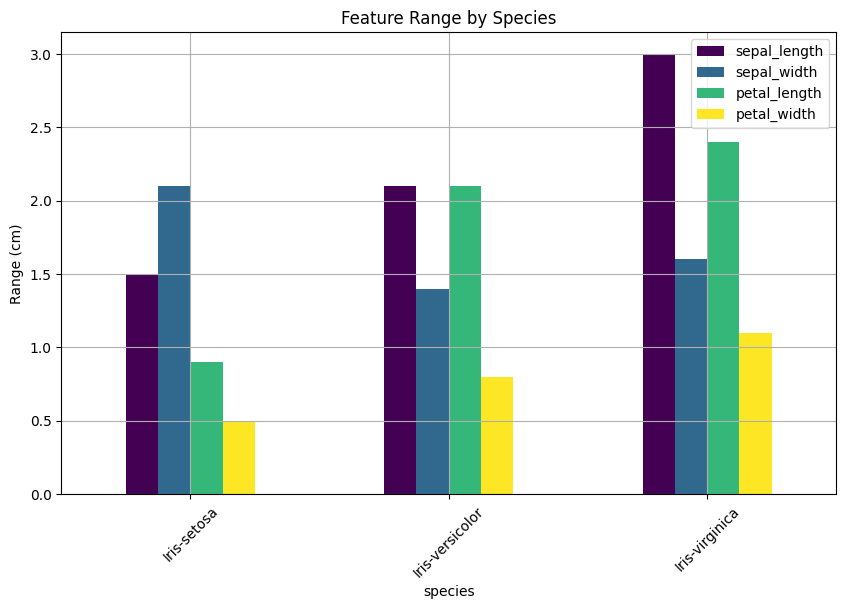

In [33]:
range_stats = iris_data.groupby('species')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].agg(lambda x: x.max() - x.min())
range_stats.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title('Feature Range by Species')
plt.ylabel('Range (cm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

***Standard Deviation of Features***

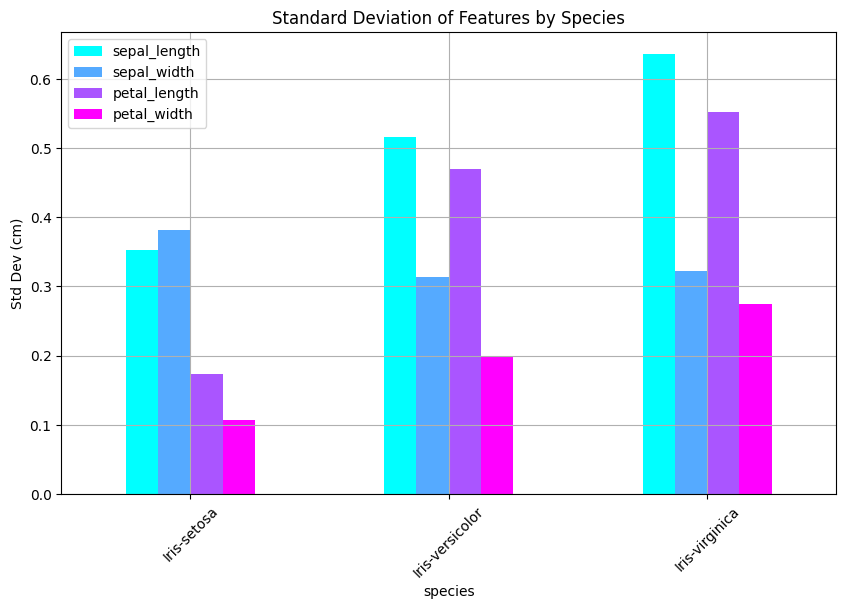

In [34]:
std_stats = iris_data.groupby('species')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].std()
std_stats.plot(kind='bar', figsize=(10,6), colormap='cool')
plt.title('Standard Deviation of Features by Species')
plt.ylabel('Std Dev (cm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

***Petal vs Sepal Width Comparison***

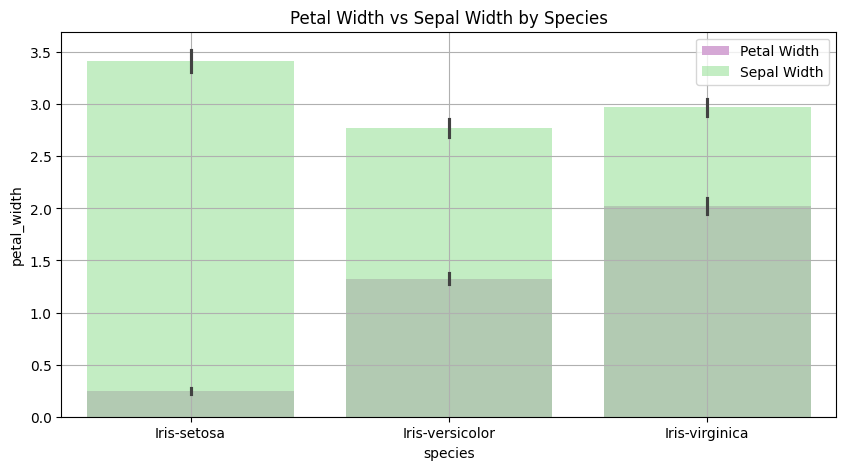

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(data=iris_data, x='species', y='petal_width', color='plum', label='Petal Width')
sns.barplot(data=iris_data, x='species', y='sepal_width', color='lightgreen', alpha=0.6, label='Sepal Width')
plt.title('Petal Width vs Sepal Width by Species')
plt.legend()
plt.grid(True)
plt.show()

***Petal Length Density by Species***

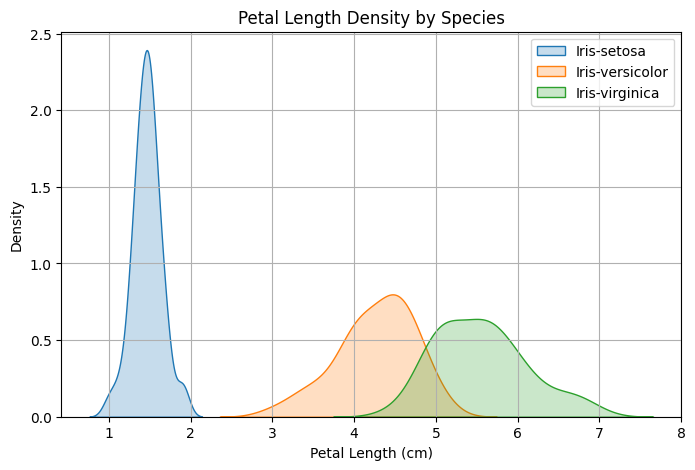

In [36]:
plt.figure(figsize=(8,5))
for sp in iris_data['species'].unique():
    sns.kdeplot(data=iris_data[iris_data['species'] == sp], x='petal_length', fill=True, label=sp)
plt.title("Petal Length Density by Species")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.show()